TCS-ION Remote Internship on - "Buil a Model to Classify Side Effects of a Drug"

# Dataset Description

In [1]:
pip install Faker

In this dataset there are 12 different columns.
1.  Age (numerical): age group range of user
2.  Condition (categorical): name of condition
3.  Date (date): date of review entry
4.  Drug (categorical): name of drug
5.  DrugId (numerical): drug id
6.  EaseOfUse (numerical): 5 star rating
7.  Effectiveness (numerical): 5 star rating
8.  Review (text): patient review
9.  Satisfaction (numerical): 5 star rating
10. Sex (categorical): gender of user
11. Side (text): side effects associated with drug (if any)
12. UsefulCount (numerical): number of users who found review useful.


In [4]:
#Import all libraries
from faker import Faker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [6]:
#load dataset
df=pd.read_csv(r'/content/webmd.csv')

# Data Exploration

In [7]:
#Print first five rows
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1.0,Male,,1.0


In [8]:
#find rows and columns
df.shape

(92988, 12)

# EDA

In [9]:
#check all the informations about data like null values.range index,data type etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92988 entries, 0 to 92987
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            92988 non-null  object 
 1   Condition      92988 non-null  object 
 2   Date           92988 non-null  object 
 3   Drug           92988 non-null  object 
 4   DrugId         92988 non-null  int64  
 5   EaseofUse      92988 non-null  int64  
 6   Effectiveness  92988 non-null  int64  
 7   Reviews        92976 non-null  object 
 8   Satisfaction   92987 non-null  float64
 9   Sex            92987 non-null  object 
 10  Sides          92987 non-null  object 
 11  UsefulCount    92987 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 8.5+ MB


In [10]:
#statistical summary of dataset
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,92988.000000,92988.000000,92988.000000,92987.000000,92987.000000
mean,33016.532757,4.032187,3.521099,3.116360,6.529784
std,49858.049915,1.301780,1.428873,1.593119,8.849408
min,63.000000,1.000000,1.000000,1.000000,0.000000
25%,2798.000000,3.000000,3.000000,1.000000,1.000000
50%,7399.000000,5.000000,4.000000,3.000000,4.000000
75%,63410.000000,5.000000,5.000000,5.000000,9.000000
max,178044.000000,5.000000,5.000000,5.000000,154.000000


In [11]:
#to check for null values
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          12
Satisfaction      1
Sex               1
Sides             1
UsefulCount       1
dtype: int64

In [12]:
df['Age'].value_counts()

45-54         21686
55-64         19786
35-44         14312
25-34         12177
65-74         10127
19-24          5956
75 or over     3668
               3169
13-18          1659
7-12            254
3-6             104
0-2              90
Name: Age, dtype: int64

In [13]:
df['Sex'].value_counts()

Female    59028
Male      27333
           6626
Name: Sex, dtype: int64

In [14]:
#check for duplicated rows
duplicates=df[df.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
               Age                                          Condition  \
12102       55-64                                High Blood Pressure   
17120       55-64                                High Blood Pressure   
21816  75 or over                                              Other   
22427       35-44                   Abnormally Long or Heavy Periods   
24302       25-34    Fungal Infection of Fingernails - Onychomycosis   
32073       45-54                                Underactive Thyroid   
32083       45-54                                Underactive Thyroid   
38672       55-64                                        Stuffy Nose   
40302  75 or over                                        Stuffy Nose   
40303       25-34                                      Cold Symptoms   
42172       55-64                                              Cough   
42174       55-64                                              Cough   
42175       45-54                           Inf

In [15]:
#to remove duplicated rows
df.drop_duplicates(inplace=True)

In [16]:
#again check for any duplicated rows present
duplicates=df[df.duplicated()]
duplicates

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


# Univariate Analysis

Histogram

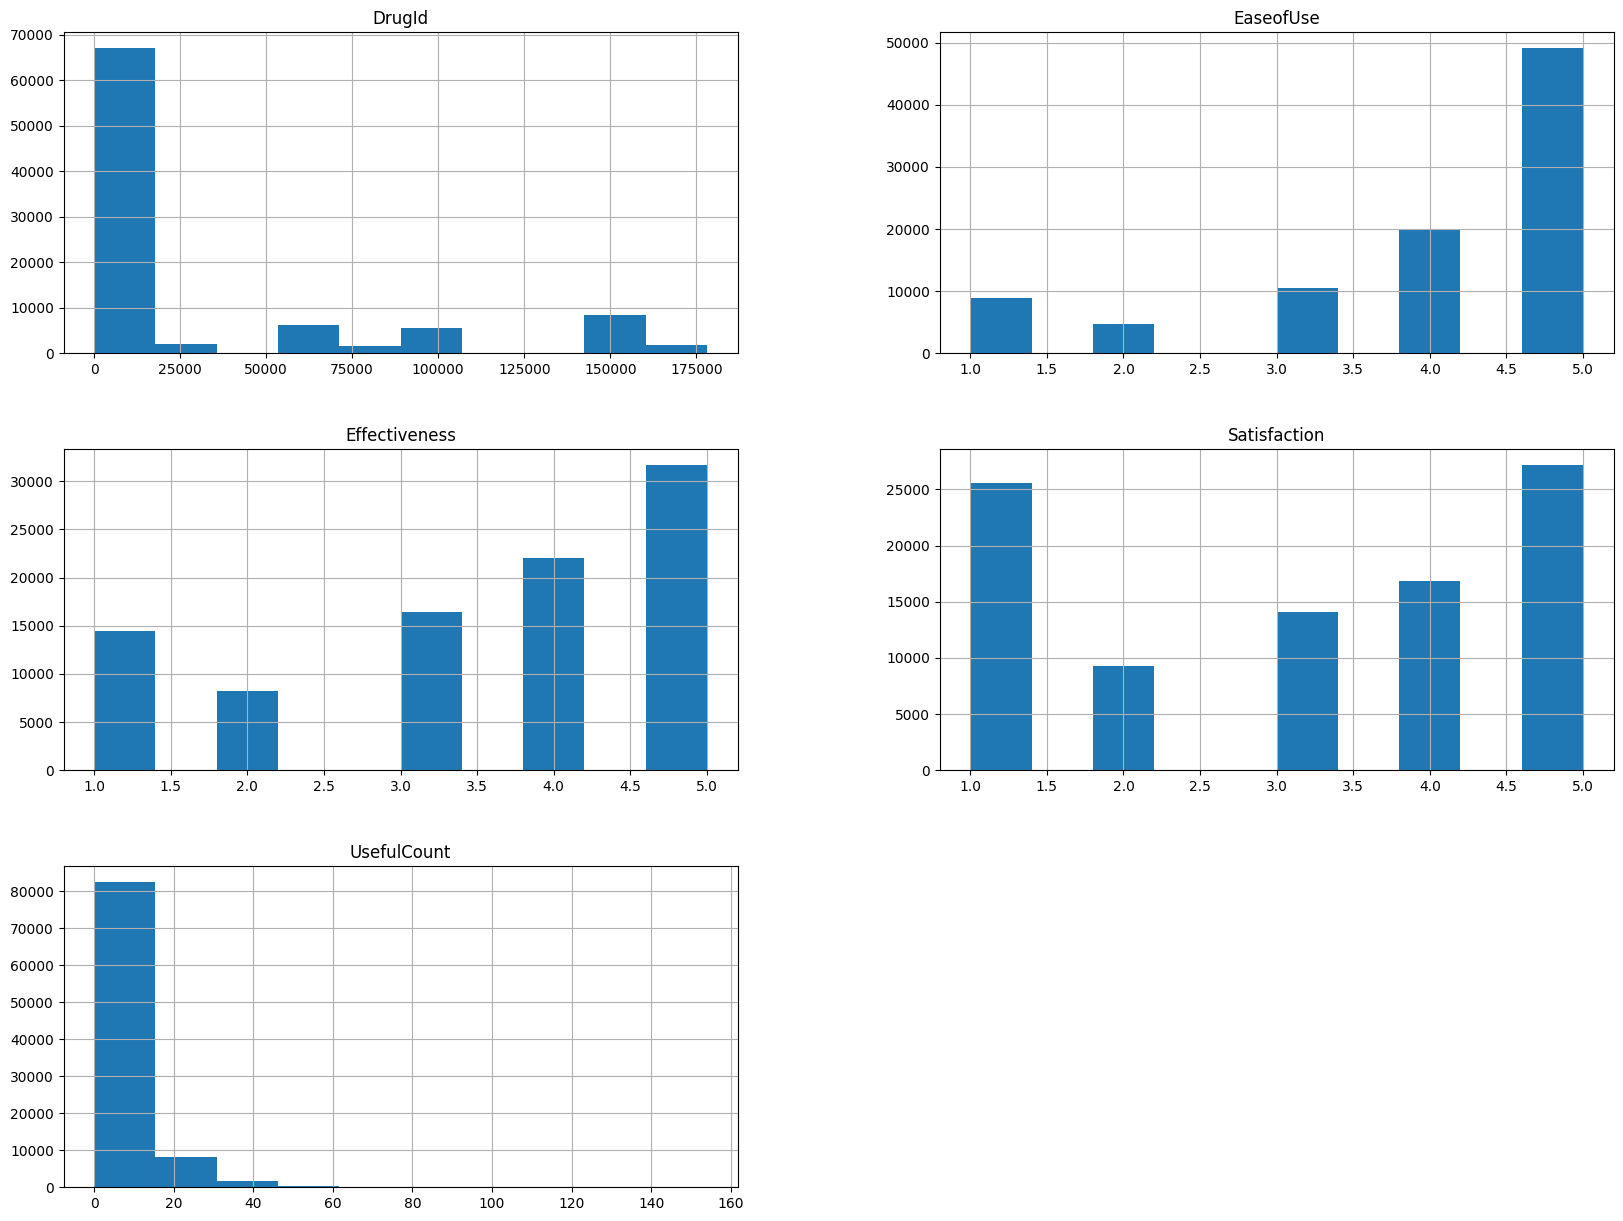

In [17]:
freqgraph=df.select_dtypes(include=['int','float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Boxplot

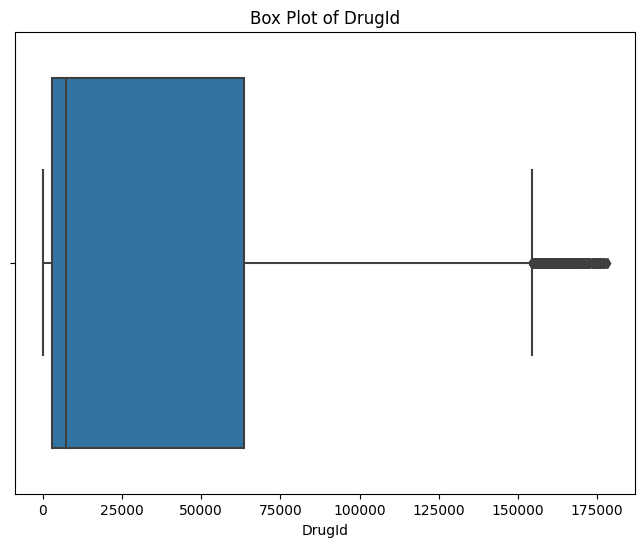

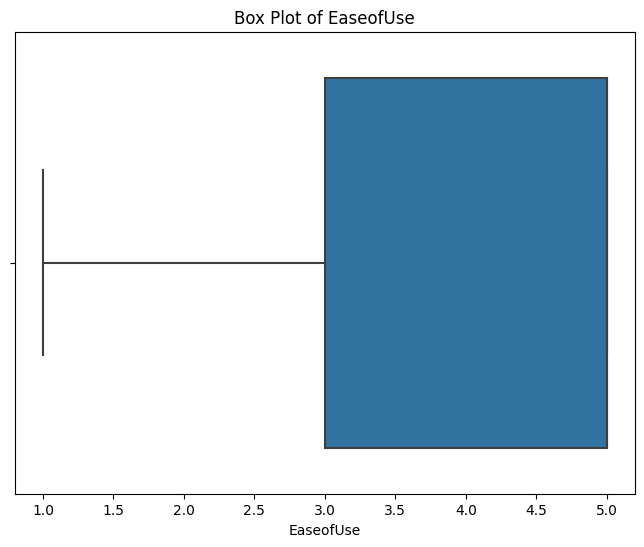

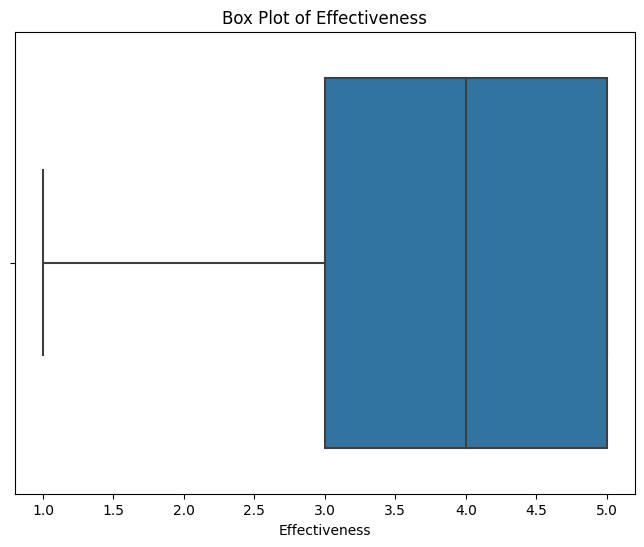

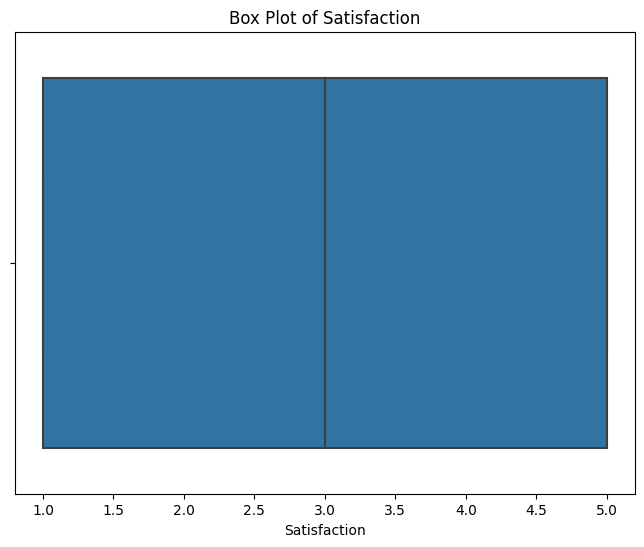

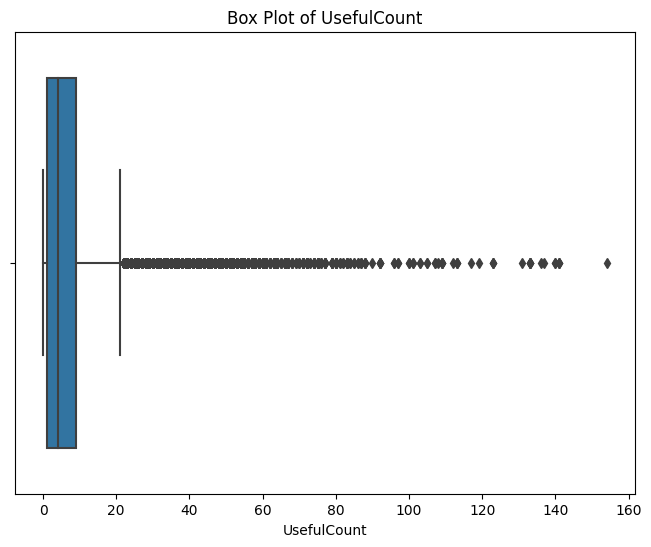

In [18]:
# Select numeric columns for box plots
numeric_columns =df.select_dtypes(include=['float64','int64']).columns
# Plot box plot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column].dropna())
    plt.title('Box Plot of ' + column)
    plt.xlabel(column)
    plt.show()

KDE (Kernel Distribution Estimation Plot) Plot

<Axes: xlabel='UsefulCount', ylabel='Density'>

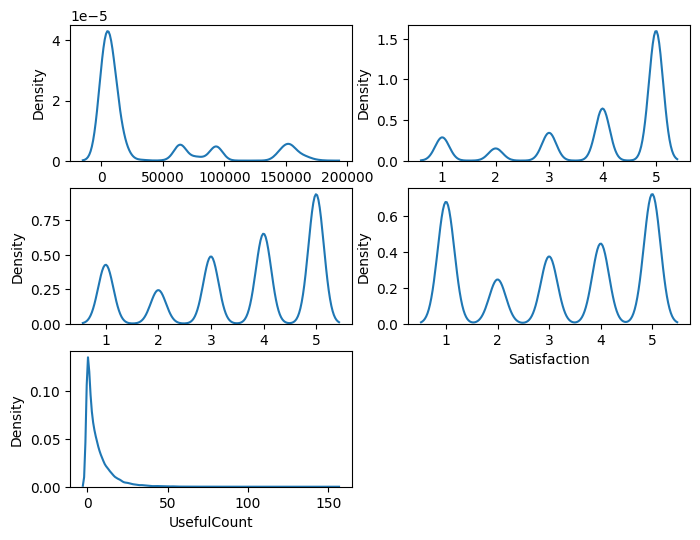

In [19]:
plt.figure(figsize=(8,6))
plt.subplot(3,2,1)
sns.kdeplot(x='DrugId',data=df,palette='Set2')
plt.subplot(3,2,2)
sns.kdeplot(x='EaseofUse',data=df,palette='Set2')
plt.subplot(3,2,3)
sns.kdeplot(x='Effectiveness',data=df,palette='Set2')
plt.subplot(3,2,4)
sns.kdeplot(x='Satisfaction',data=df,palette='Set2')
plt.subplot(3,2,5)
sns.kdeplot(x='UsefulCount',data=df,palette='Set2')

Count Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '75 or over'),
  Text(1, 0, '25-34'),
  Text(2, 0, '65-74'),
  Text(3, 0, '35-44'),
  Text(4, 0, '55-64'),
  Text(5, 0, '45-54'),
  Text(6, 0, '19-24'),
  Text(7, 0, ' '),
  Text(8, 0, '13-18'),
  Text(9, 0, '7-12'),
  Text(10, 0, '0-2'),
  Text(11, 0, '3-6')])

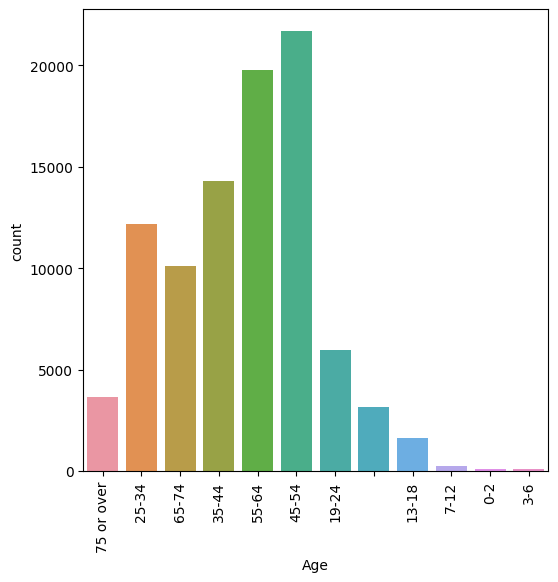

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='Age', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Satisfaction', ylabel='count'>

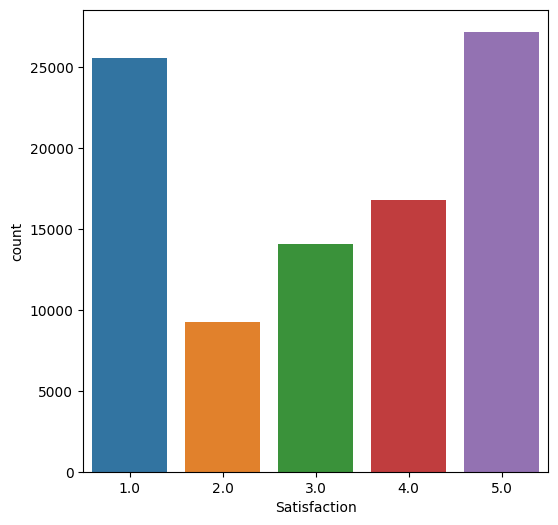

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Satisfaction', data=df)

<Axes: xlabel='Sex', ylabel='count'>

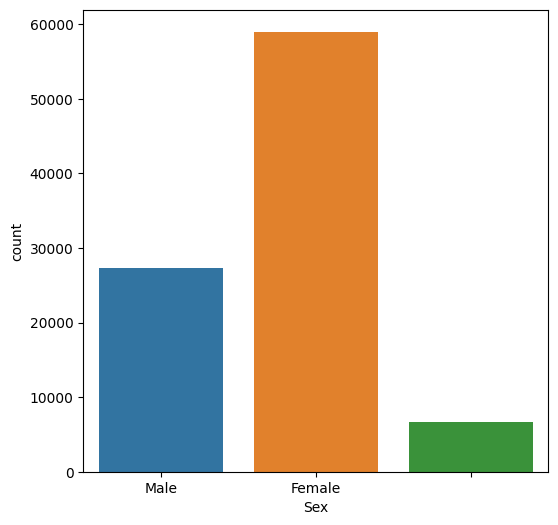

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Effectiveness', ylabel='count'>

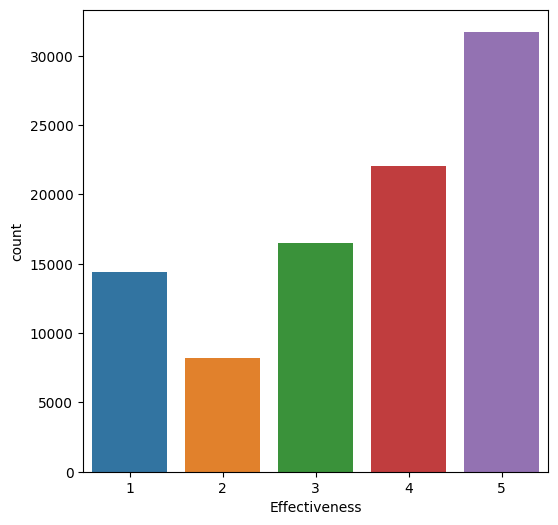

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Effectiveness', data=df)

Pie Chart for categorical datas

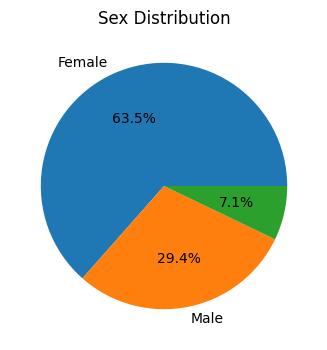

In [24]:
# Count the occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

Bivariate Analysis

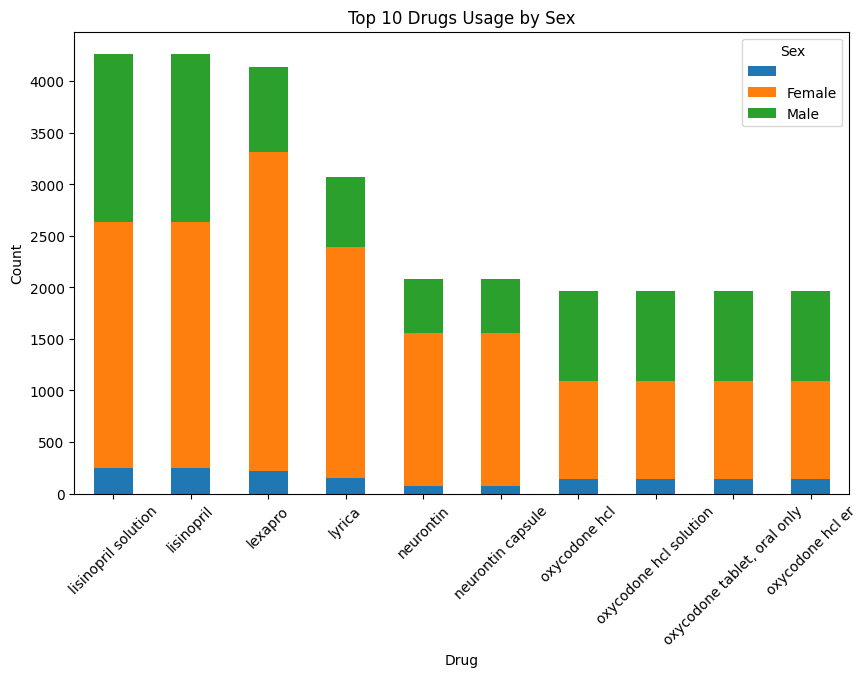

In [25]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Sex']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Drugs Usage by Sex')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()

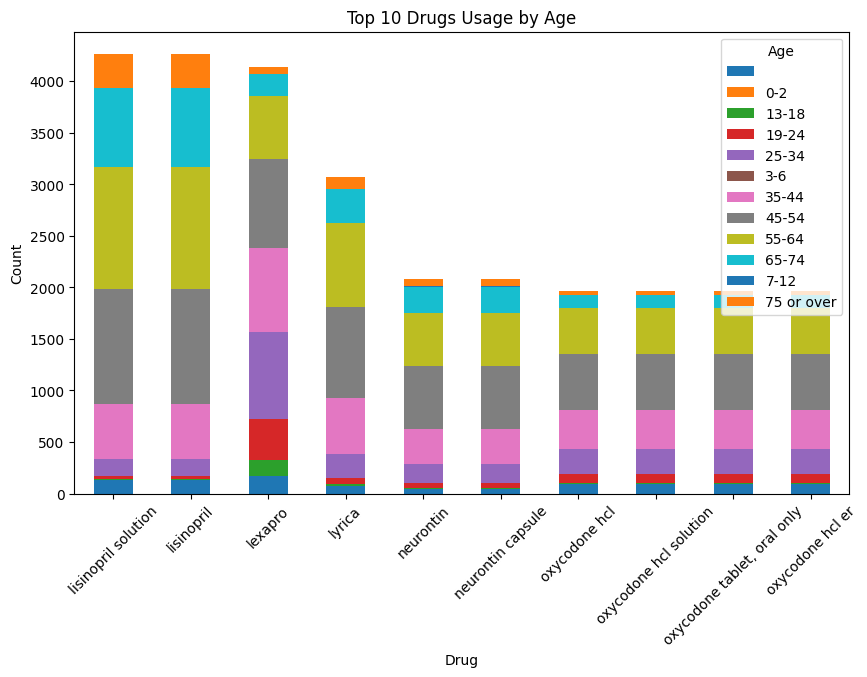

In [26]:
drug_counts = df['Drug'].value_counts().nlargest(10)
drug_sex_counts = df.groupby(['Drug', 'Age']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs Usage by Age')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=45)
plt.show()

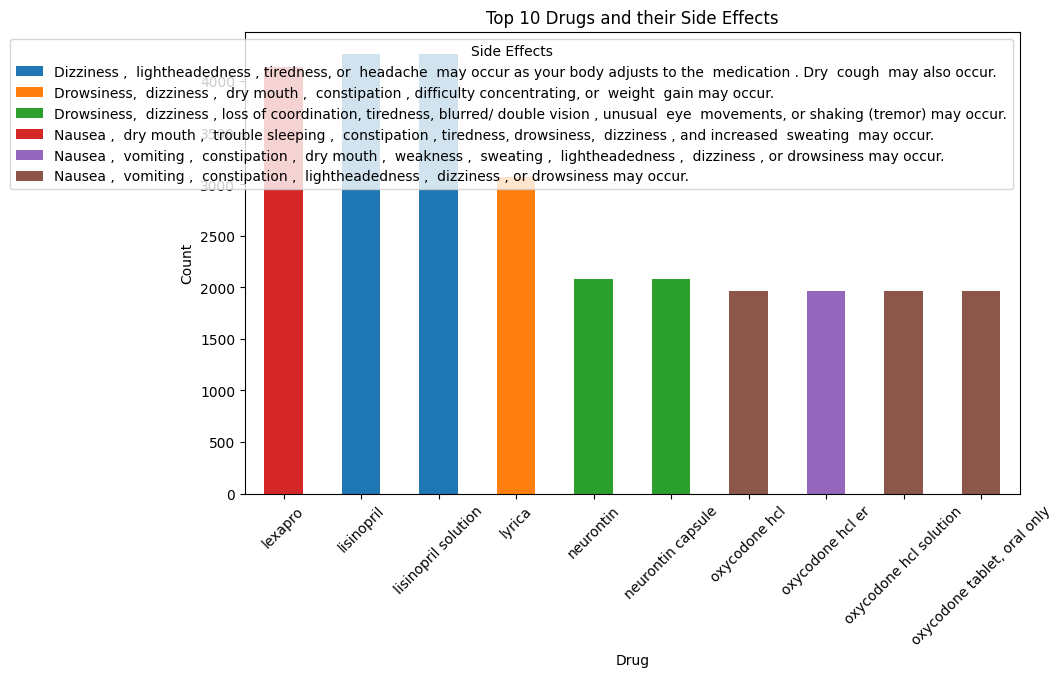

In [27]:
drug_counts = df['Drug'].value_counts().nlargest(10)
top_drugs_df = df[df['Drug'].isin(drug_counts.index)]
drug_side_counts = top_drugs_df.groupby(['Drug', 'Sides']).size().unstack()
drug_side_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 10 Drugs and their Side Effects')
plt.xlabel('Drug')
plt.ylabel('Count')

plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)

plt.show()


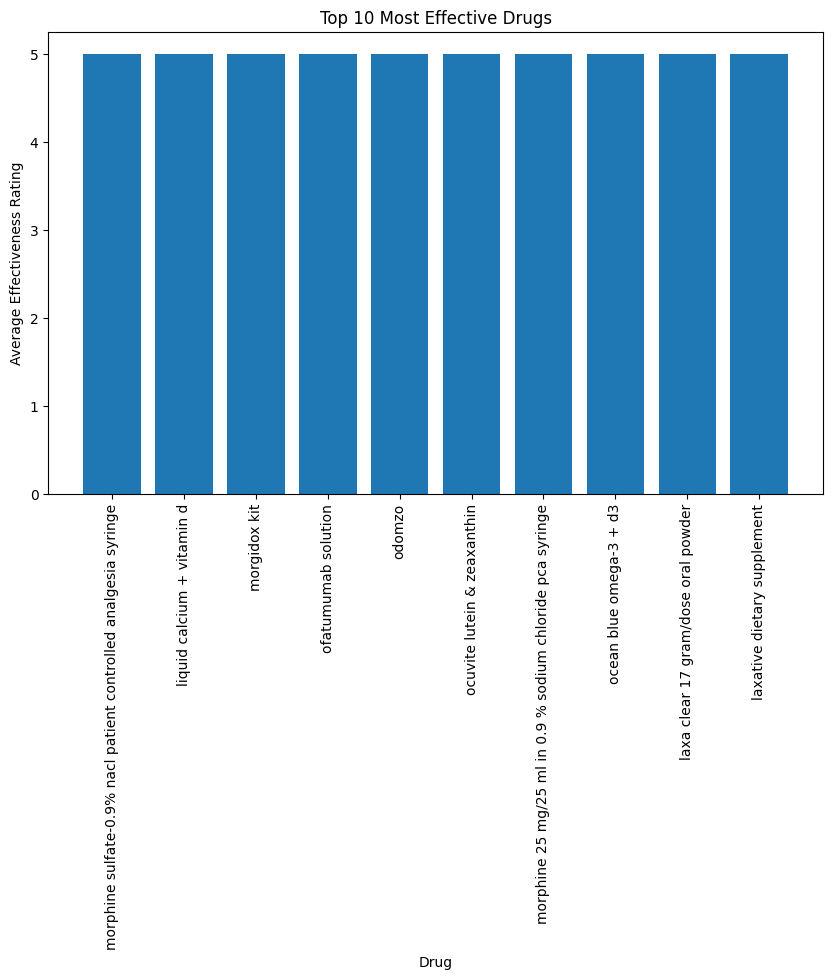

In [28]:
# Group the data by 'Drug' and calculate the average effectiveness rating for each drug
drug_effectiveness = df.groupby('Drug')['Effectiveness'].mean().sort_values(ascending=False)

# Get the top 10 most effective drugs
top_10_drugs = drug_effectiveness.head(10)

# Plot a bar chart to visualize the effectiveness ratings of the top 10 drugs
plt.figure(figsize=(10, 6))
plt.bar(top_10_drugs.index, top_10_drugs.values)

plt.title('Top 10 Most Effective Drugs')
plt.xlabel('Drug')
plt.ylabel('Average Effectiveness Rating')

plt.xticks(rotation=90)

plt.show()

Multivariate Analysis

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
DrugId,1.000000,-0.018647,0.000063,-0.042643,-0.024595
EaseofUse,-0.018647,1.000000,0.550017,0.552500,0.018769
Effectiveness,0.000063,0.550017,1.000000,0.779313,0.035143
Satisfaction,-0.042643,0.552500,0.779313,1.000000,-0.002991
UsefulCount,-0.024595,0.018769,0.035143,-0.002991,1.000000


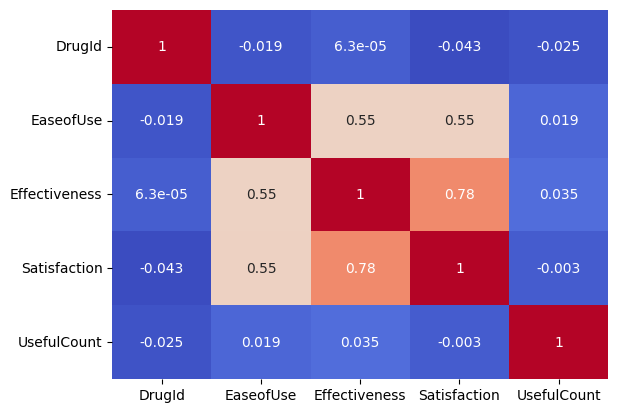

In [29]:
# Heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=False,cmap= 'coolwarm')
corr

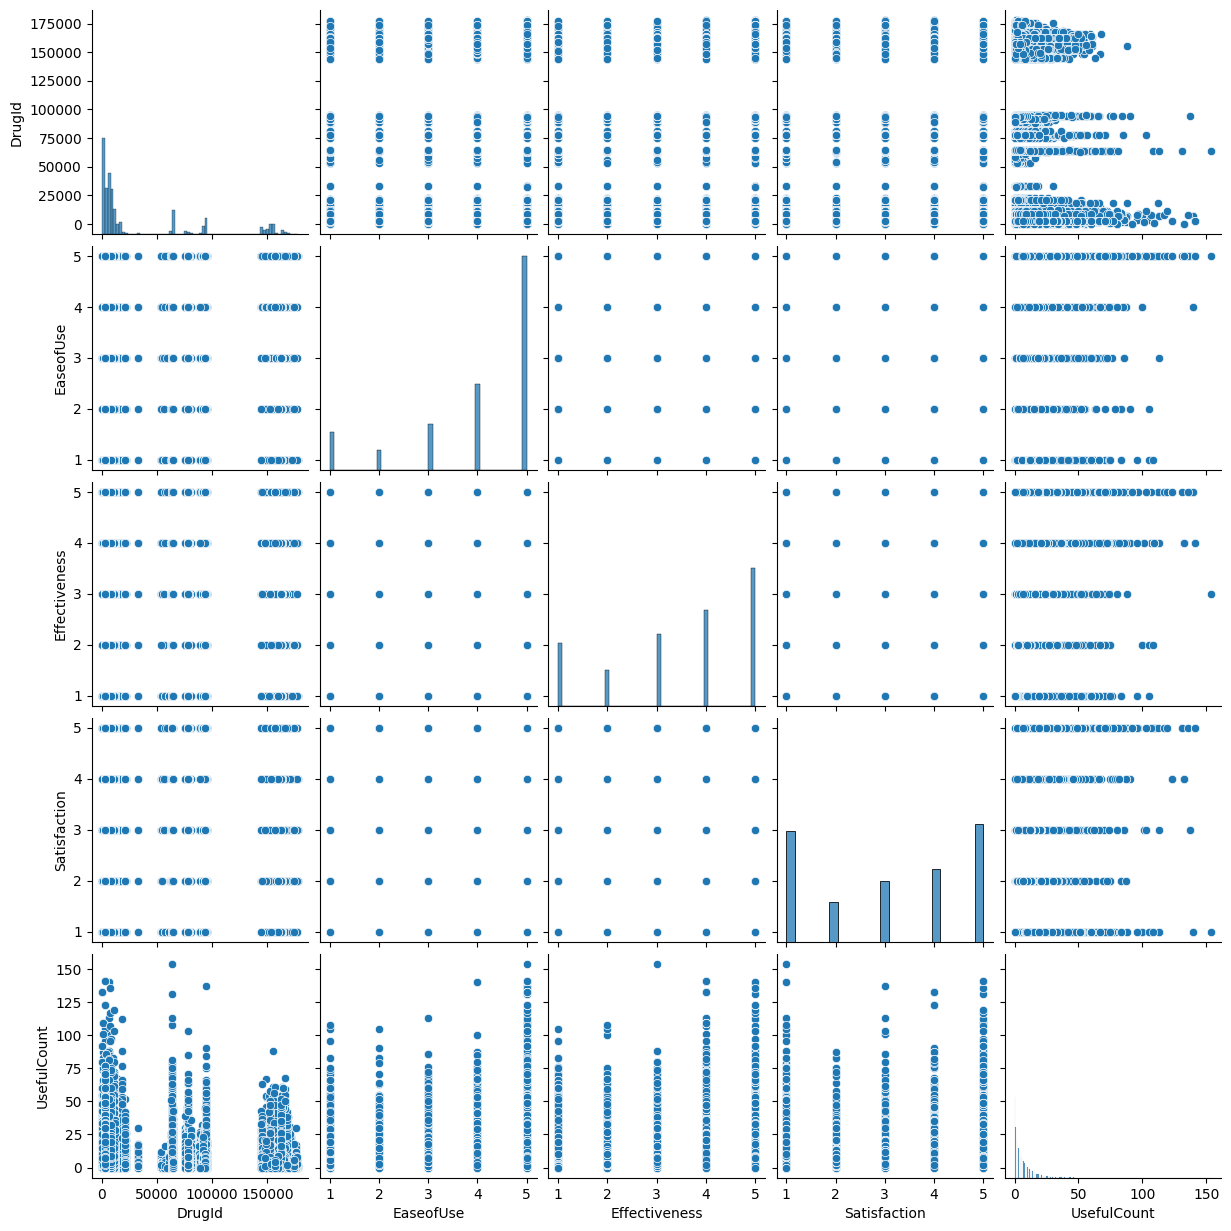

In [30]:
#Pair Plot
sns.pairplot(df)

# Data Preprocessing

# Handling Null Values

Here we have null values in column names' Review'.We need to remove it by drop.

In [31]:
df_new = df.dropna(subset=['Reviews'])

In [32]:
df_new.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     1
Sex              1
Sides            1
UsefulCount      1
dtype: int64

# Encoding

In this case , use Label encoding & Onehot Encoding to resolve this.

In [33]:
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame with the original columns
encoded_df = df.copy()

# Encode the "Reviews" column
review_encoder = LabelEncoder()
encoded_df['Reviews'] = review_encoder.fit_transform(df['Reviews'])

# Encode the "Sides" column
sides_encoder = LabelEncoder()
encoded_df['Sides'] = sides_encoder.fit_transform(df['Sides'])
encoded_df = pd.get_dummies(encoded_df, columns=['Age'])

In [34]:
encoded_df.head()

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,28023,5.0,Male,125,...,0,0,0,0,0,0,0,0,0,1
1,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,47207,5.0,Female,125,...,0,0,1,0,0,0,0,0,0,0
2,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,55715,3.0,Female,0,...,0,0,0,0,0,0,0,1,0,0
3,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,5426,1.0,Female,0,...,0,0,0,0,0,0,0,0,0,1
4,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,34682,1.0,Male,0,...,0,0,0,0,1,0,0,0,0,0


# Outlier Detection

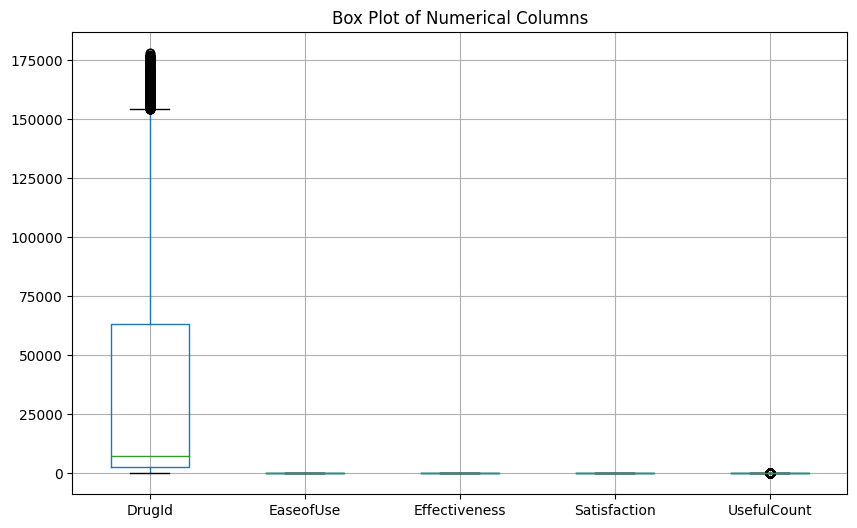

In [35]:
# Select only the numerical columns
numerical_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.show()

# Treating outliers

In [36]:
#DrugId
IQR=stats.iqr(encoded_df.DrugId,interpolation="midpoint")
IQR

60612.0

In [37]:
Q1=encoded_df.DrugId.quantile(0.25)
Q3=encoded_df.DrugId.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-88120.0, 154328.0)

In [38]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.DrugId>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
6,Birth Control,6/15/2017,wymzya fe,163180,5,5,7473,2.0,Female,310,...,0,0,1,0,0,0,0,0,0,0
7,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,19560,5.0,Female,310,...,0,0,0,0,0,1,0,0,0,0
8,Acne,4/27/2016,wymzya fe,163180,4,2,41,2.0,Female,310,...,0,0,1,0,0,0,0,0,0,0
11,Birth Control,11/17/2018,lyza,164750,5,5,39040,2.0,,309,...,0,1,0,0,0,0,0,0,0,0
12,Birth Control,7/3/2018,lyza,164750,2,1,43101,1.0,Female,309,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89478,Narcotic Addiction,5/17/2014,methadone hcl syringe,156918,5,5,24975,5.0,Female,284,...,0,0,1,0,0,0,0,0,0,0
89479,Other,11/5/2012,methadone hcl syringe,156918,5,5,50663,5.0,Male,284,...,1,0,0,0,0,0,0,0,0,0
89480,Severe Pain,7/27/2012,methadone hcl syringe,156918,5,5,40920,5.0,Male,284,...,0,0,0,0,0,1,0,0,0,0
89481,Severe Pain,1/31/2012,methadone hcl syringe,156918,4,4,52065,3.0,Male,284,...,0,0,0,0,0,0,0,1,0,0


In [39]:
encoded_df.loc[encoded_df.DrugId<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [40]:
encoded_df.loc[encoded_df['DrugId']>max_limit,['DrugId']]=np.median(encoded_df['DrugId'])

In [41]:
encoded_df.loc[encoded_df.DrugId>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [42]:
#EaseofUse
IQR=stats.iqr(encoded_df.EaseofUse,interpolation="midpoint")
IQR

2.0

In [43]:
Q1=encoded_df.EaseofUse.quantile(0.25)
Q3=encoded_df.EaseofUse.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 8.0)

In [44]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.EaseofUse>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [45]:
encoded_df.loc[encoded_df.EaseofUse<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [46]:
encoded_df.loc[encoded_df['EaseofUse']>max_limit,['EaseofUse']]=np.median(encoded_df['EaseofUse'])

In [47]:
encoded_df.loc[encoded_df.EaseofUse>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [48]:
#Effectiveness
IQR=stats.iqr(encoded_df.Effectiveness,interpolation="midpoint")
IQR

2.0

In [49]:
Q1=encoded_df.Effectiveness.quantile(0.25)
Q3=encoded_df.Effectiveness.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.0, 8.0)

In [50]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [51]:
encoded_df.loc[encoded_df.Effectiveness<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [52]:
encoded_df.loc[encoded_df['Effectiveness']>max_limit,['Effectiveness']]=np.median(encoded_df['Effectiveness'])

In [53]:
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [54]:
#UsefulCount
IQR=stats.iqr(encoded_df.UsefulCount,interpolation="midpoint")
IQR

nan

In [55]:
Q1=encoded_df.UsefulCount.quantile(0.25)
Q3=encoded_df.UsefulCount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(nan, nan)

In [56]:
#check if any outliers present less than min limit & greater than max limit
encoded_df.loc[encoded_df.UsefulCount>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [57]:
encoded_df.loc[encoded_df.UsefulCount<min_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


In [58]:
encoded_df.loc[encoded_df['UsefulCount']>max_limit,['UsefulCount']]=np.median(encoded_df['UsefulCount'])

In [59]:
encoded_df.loc[encoded_df.Effectiveness>max_limit]

,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over


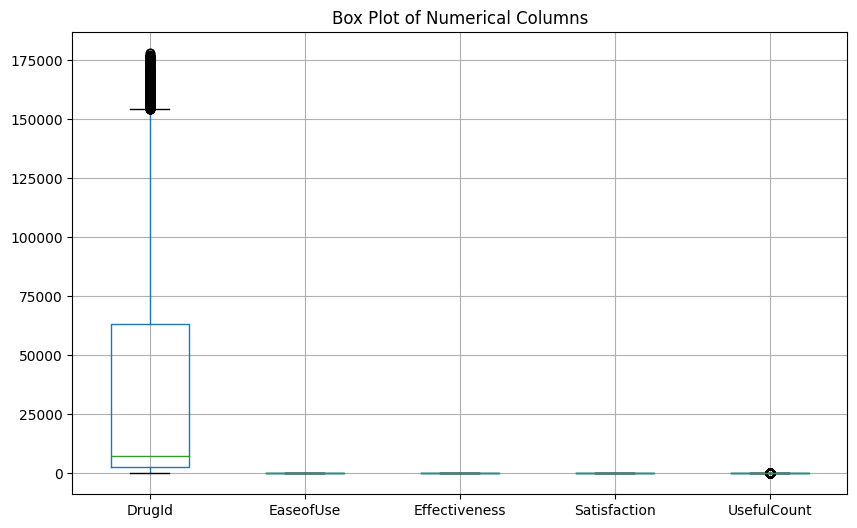

In [60]:
# Select only the numerical columns
numerical_cols = encoded_df.select_dtypes(include=['int64', 'float64']).columns

# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Box Plot of Numerical Columns')
plt.show()

# Feature Engineering

# Feature Extraction

Adding Name and race columns

In [61]:
df1 = Faker()

def create_names(n):
    name = []
    for _ in range(0, n):
        name.append(df1.name())
    return name

name_list = create_names(362806)
df_name = pd.DataFrame(name_list, columns=['Name'])

In [62]:
df_name.head()

,Name
0,Jennifer Smith
1,Anthony Boone
2,Charlotte Thomas
3,James Vaughn
4,Nancy Jordan


In [63]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list
    #with a chocie from each population

    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'],
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [64]:
df_race=pd.DataFrame(list, columns = ['Race'])
df_race.head()

,Race
0,Hispanic
1,White
2,Hispanic
3,Hispanic
4,Asian


# Concatenating name and race columns

In [65]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [67]:
enoded_df=pd.read_csv(r'/content/webmd.csv')

In [68]:
#Creating Final Dataset
encoded_df = pd.concat([df_nr, encoded_df], axis=1).reindex(encoded_df.index)

In [69]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,Jennifer Smith,Hispanic,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,28023.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Anthony Boone,White,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,47207.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Charlotte Thomas,Hispanic,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,55715.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,James Vaughn,Hispanic,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,5426.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Nancy Jordan,Asian,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,34682.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Encode the "Name" column
Name_encoder = LabelEncoder()
encoded_df['Name'] = Name_encoder.fit_transform(encoded_df['Name'])
# Encode the "Race" column
Race_encoder = LabelEncoder()
encoded_df['Race'] = Race_encoder.fit_transform(encoded_df['Race'])
# Encode the "Race" column
Sex_encoder = LabelEncoder()
encoded_df['Sex'] = Sex_encoder.fit_transform(encoded_df['Sex'])
# Encode the "Race" column
Condition_encoder = LabelEncoder()
encoded_df['Condition'] = Condition_encoder.fit_transform(encoded_df['Condition'])

In [71]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over
0,28868,2,704,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,28023.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4800,3,181,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,47207.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11530,2,517,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,55715.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26578,2,517,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,5426.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,48814,0,517,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,34682.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Creation of New Side Effects Column

In [72]:
data=np.where(encoded_df['Satisfaction'] == 1.0, "Nil", encoded_df['Satisfaction'])
data=np.where(encoded_df['Satisfaction'] == 2.0, "Mild",data)
data=np.where(encoded_df['Satisfaction'] == 3.0, "Moderate", data)
data=np.where(encoded_df['Satisfaction'] == 4.0, "Severe", data)
data=np.where(encoded_df['Satisfaction'] == 5.0, "Extreme",data)

In [73]:
encoded_df['SideEffects'] = data

In [74]:
encoded_df.head()

,Name,Race,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,SideEffects
0,28868,2,704,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,28023.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Extreme
1,4800,3,181,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,47207.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extreme
2,11530,2,517,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,55715.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Moderate
3,26578,2,517,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,5426.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil
4,48814,0,517,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,34682.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nil


# EDA of New Added Feature -SideEffects

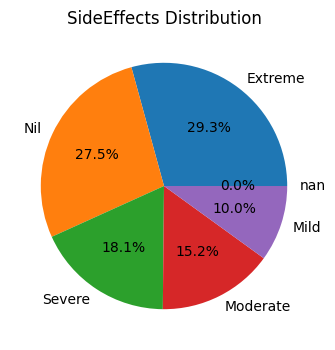

In [75]:
# Count the occurrences of each sex
SideEffects_counts = encoded_df['SideEffects'].value_counts()

# Create a pie chart for the sex distribution
plt.figure(figsize=(8, 4))
plt.pie(SideEffects_counts, labels=SideEffects_counts.index, autopct='%1.1f%%')
plt.title('SideEffects Distribution')
plt.show()

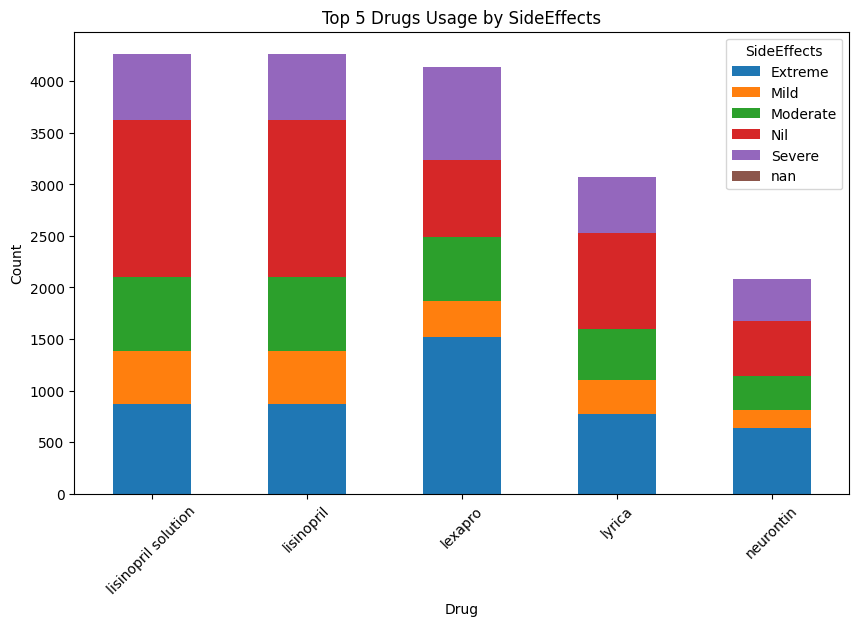

In [76]:
drug_counts = encoded_df['Drug'].value_counts().nlargest(5)
drug_sex_counts = encoded_df.groupby(['Drug', 'SideEffects']).size().unstack().loc[drug_counts.index]
drug_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top 5 Drugs Usage by SideEffects')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='SideEffects', loc='upper right')
plt.xticks(rotation=45)
plt.show()

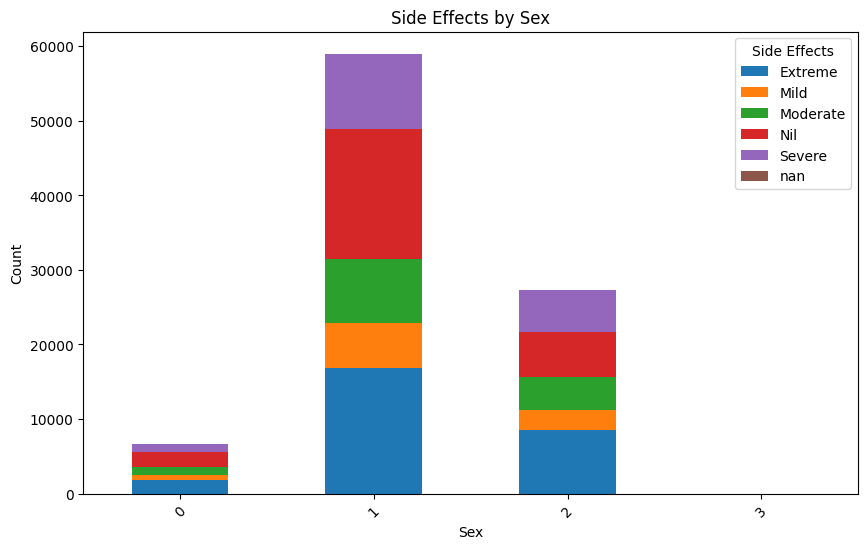

In [77]:
age_sideeffect_counts = encoded_df.groupby(['Sex', 'SideEffects']).size().unstack()
age_sideeffect_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Side Effects by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Side Effects', loc='upper right')
plt.xticks(rotation=45)
plt.show()


# Feature Reduction

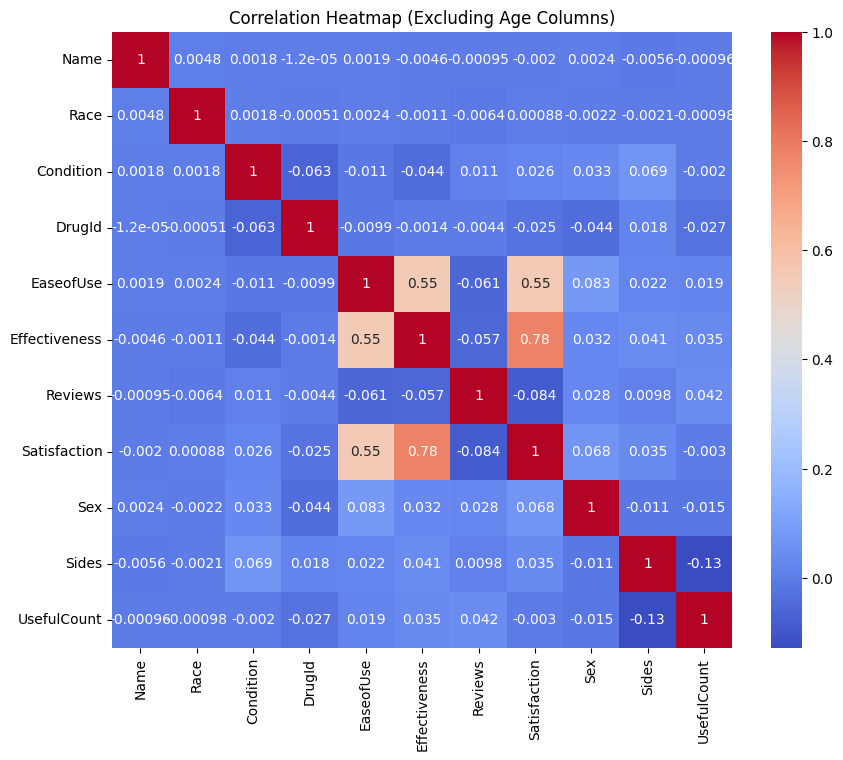

In [78]:
# Identify the age columns to exclude
age_columns = [col for col in encoded_df.columns if col.startswith('Age_')]

# Create a copy of the encoded dataframe excluding the age columns
heatmap_df = encoded_df.drop(columns=age_columns)

# Compute the correlation matrix
correlation_matrix = heatmap_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Excluding Age Columns)')
plt.show()

# Here we can drop Date, Name, Drug Id, Reviews, Satisfaction, UsefulCount as it has no significance with side effects .

In [79]:
encoded_df=encoded_df.drop(columns = ['Name','Date','Drug','DrugId','Reviews','Satisfaction','UsefulCount'],axis=1)
encoded_df=encoded_df.reset_index(drop=True)
encoded_df.head()

,Race,Condition,EaseofUse,Effectiveness,Sex,Sides,Age_,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_3-6,Age_35-44,Age_45-54,Age_55-64,Age_65-74,Age_7-12,Age_75 or over,SideEffects
0,2,704,5.0,5.0,2,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Extreme
1,3,181,5.0,5.0,1,125.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extreme
2,2,517,2.0,3.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Moderate
3,2,517,2.0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Nil
4,0,517,1.0,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nil


In [80]:
#target & predict values are assigned to variables y and x respectively'
y=encoded_df["SideEffects"]
x=encoded_df.drop("SideEffects",axis=1)
y

0         Extreme
1         Extreme
2        Moderate
3             Nil
4             Nil
           ...   
92941    Moderate
92942         Nil
92943         Nil
92944     Extreme
92945         nan
Name: SideEffects, Length: 92946, dtype: object

In [81]:

#Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [82]:
# import StandardScalar & create instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Model Building

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [84]:
y_pred=model.predict(x_test)

In [85]:
#find cnclusion matrix & to find accuracy,precision,recall,f1
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision = ', precision)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy =  0.6224852071005917
Precision =  0.5495147279017717
Recall score: 0.6224852071005917
F1 score: 0.5760367620291966


Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [87]:
y_pred_rf=rf_clf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))

Accuracy =  0.6566971490048413


Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred_dt=dt_clf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_dt))

Accuracy =  0.6047875201721356


SVM

In [90]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [91]:
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.636578805809575


In [92]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

In [93]:
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.6561592253899946


In [94]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

SVC(kernel='poly')

In [95]:
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))

Accuracy =  0.6493813878429263


KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

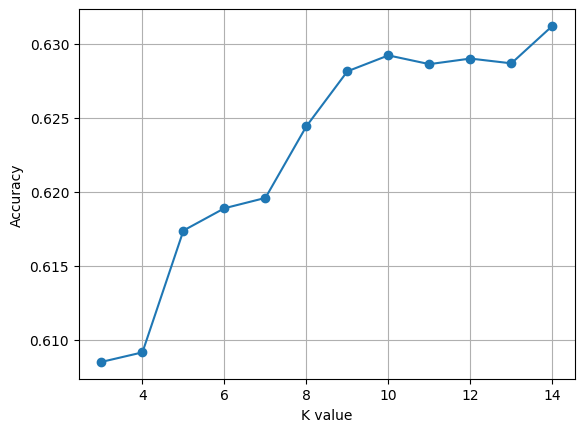

In [97]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [98]:
#take k value as 14, find accuracy,precision,recall,f1 value,print confusion matrix
classifier = KNeighborsClassifier(n_neighbors=14,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)
print('Accuracy = ',accuracy_score(y_test,y_pred))
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision = ', precision)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall score:', recall)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)
confusion_matrix(y_test,y_pred)

Accuracy =  0.6311995696611081
Precision =  0.6111270306141903
Recall score: 0.6311995696611081
F1 score: 0.6163804881770724


array([[4734,   19,  118,   76,  575,    0],
       [ 198,  308,  523,  623,  217,    0],
       [ 429,  234, 1242,  312,  600,    0],
       [ 323,  275,  454, 3807,  234,    0],
       [1011,  118,  378,  138, 1643,    0],
       [   1,    0,    0,    0,    0,    0]])